# Bibliotecas auxiliares - Numpy e pandas

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [32]:
with open('penguins_size.csv', 'r') as f:
    a = f.read()

In [47]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap],
    sep=<object object at 0x000002853DF2B1A0>,
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=

In [83]:
df = pd.read_csv('penguins_size.csv')

In [49]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [43]:
df.iloc[5:10]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [84]:
# df.species
df['body_mass_g'].mean()

4201.754385964912

In [85]:
df['body_mass_g'].min()

2700.0

In [86]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [87]:
# df = df.dropna()
df.dropna(inplace=True)

In [88]:
df = df[df.sex != '.']

In [71]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


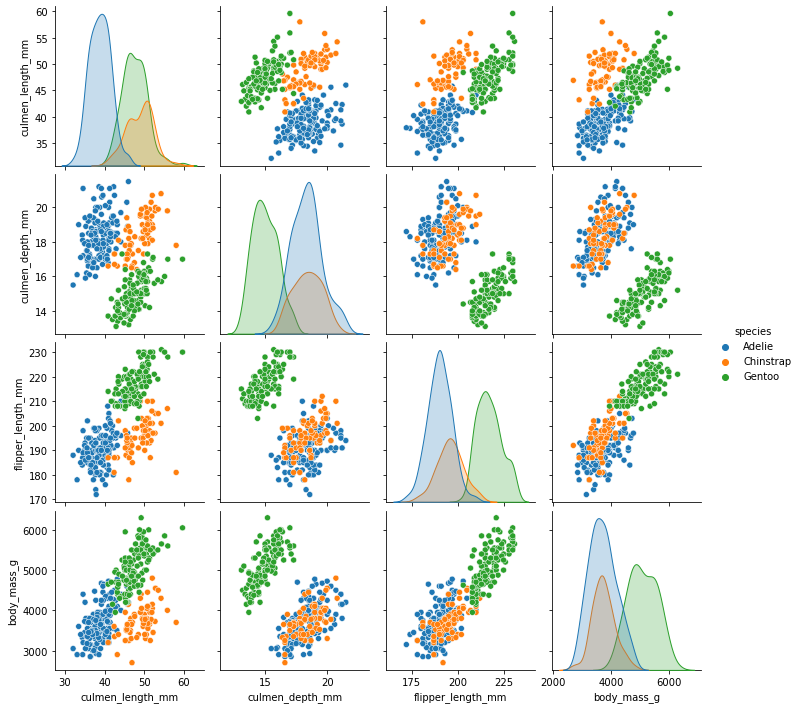

In [73]:
sns.pairplot(df, hue='species')

In [79]:
px.histogram(df['culmen_length_mm'])

In [89]:
fig = px.scatter(df, x="culmen_length_mm", y="body_mass_g", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [92]:
fig = px.scatter_3d(df, x='culmen_length_mm', y='body_mass_g', z='flipper_length_mm',
              color='sex')
fig.show()

In [98]:
df.query('sex == "MALE" and body_mass_g > 3650.0')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,MALE
...,...,...,...,...,...,...,...
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE


In [101]:
massa = df.body_mass_g.to_numpy()

In [102]:
type(massa)

numpy.ndarray

In [103]:
massa.shape

(333,)

In [106]:
massa.argmax()

231

In [107]:
massa[231]

6300.0

In [110]:
massa[:30]

array([3750., 3800., 3250., 3450., 3650., 3625., 4675., 3200., 3800.,
       4400., 3700., 3450., 4500., 3325., 4200., 3400., 3600., 3800.,
       3950., 3800., 3800., 3550., 3200., 3150., 3950., 3250., 3900.,
       3300., 3900., 3325.])

In [111]:
np.sqrt(massa)

array([61.23724357, 61.64414003, 57.00877125, 58.73670062, 60.41522987,
       60.20797289, 68.37397166, 56.56854249, 61.64414003, 66.33249581,
       60.8276253 , 58.73670062, 67.08203932, 57.66281297, 64.80740698,
       58.30951895, 60.        , 61.64414003, 62.84902545, 61.64414003,
       61.64414003, 59.58187644, 56.56854249, 56.1248608 , 62.84902545,
       57.00877125, 62.44997998, 57.44562647, 62.44997998, 57.66281297,
       64.42049363, 62.84902545, 59.58187644, 57.44562647, 68.19090848,
       56.1248608 , 62.44997998, 55.67764363, 66.33249581, 54.77225575,
       67.82329983, 58.52349955, 58.73670062, 64.42049363, 59.16079783,
       65.57438524, 58.73670062, 63.63961031, 53.85164807, 60.8276253 ,
       59.58187644, 61.64414003, 53.38539126, 61.23724357, 56.1248608 ,
       66.33249581, 60.        , 63.63961031, 53.38539126, 62.84902545,
       57.87918451, 64.03124237, 55.22680509, 66.70832032, 60.        ,
       62.44997998, 59.58187644, 64.42049363, 60.8276253 , 65.19

In [116]:
a = np.zeros((4, 4))

In [118]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [153]:
b = 30 + 10*np.random.random((6, 6))
print(b)

[[30.25664783 34.14851465 35.3380306  38.14061155 37.76678814 32.46489711]
 [37.59597831 36.39175788 38.3283624  31.09370361 30.14501458 31.93183696]
 [34.43030014 35.92382757 36.040899   31.49911965 39.97421388 33.89840352]
 [30.17581237 32.73388403 38.65651893 33.72267199 34.28809245 34.97149292]
 [31.58967586 33.63284794 35.6034341  31.47404227 32.28447159 35.52376917]
 [38.02925178 39.73465095 33.39229615 37.21989846 34.44877942 39.73719787]]


In [154]:
b[2:5,2:4]

array([[36.040899  , 31.49911965],
       [38.65651893, 33.72267199],
       [35.6034341 , 31.47404227]])

In [160]:
np.random.seed(42)

In [161]:
g = np.random.normal(10, 2, 10000)

In [162]:
px.histogram(g)